In [14]:
!pip install folium

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

In [28]:
# Load the dataset
file_path = 'RTA Dataset.csv'
data = pd.read_csv(file_path)



In [30]:
# Display the first few rows of the dataset
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [76]:
data.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour
12311,2024-08-03 16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,2024-08-03 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,2024-08-03 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,2024-08-03 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13
12315,2024-08-03 13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury,13


In [32]:
# Data overview
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [34]:
data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [78]:
# Checking the duplicate values
data.duplicated().sum()

0

In [80]:
# Checking the null values
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [84]:
# Filling the null values
data['Educational_level'].fillna(data['Educational_level'].mode()[0], inplace=True)
data['Vehicle_driver_relation'].fillna(data['Vehicle_driver_relation'].mode()[0], inplace=True)
data['Driving_experience'].fillna(data['Driving_experience'].mode()[0], inplace=True)
data['Type_of_vehicle'].fillna(data['Type_of_vehicle'].mode()[0], inplace=True)
data['Owner_of_vehicle'].fillna(data['Owner_of_vehicle'].mode()[0], inplace=True)
data['Service_year_of_vehicle'].fillna(data['Service_year_of_vehicle'].mode()[0], inplace=True)
data['Defect_of_vehicle'].fillna(data['Defect_of_vehicle'].mode()[0], inplace=True)
data['Area_accident_occured'].fillna(data['Area_accident_occured'].mode()[0], inplace=True)
data['Lanes_or_Medians'].fillna(data['Lanes_or_Medians'].mode()[0], inplace=True)
data['Road_allignment'].fillna(data['Road_allignment'].mode()[0], inplace=True)
data['Types_of_Junction'].fillna(data['Types_of_Junction'].mode()[0], inplace=True)
data['Road_surface_type'].fillna(data['Road_surface_type'].mode()[0], inplace=True)
data['Type_of_collision'].fillna(data['Type_of_collision'].mode()[0], inplace=True)
data['Vehicle_movement'].fillna(data['Vehicle_movement'].mode()[0], inplace=True)
data['Work_of_casuality'].fillna(data['Work_of_casuality'].mode()[0], inplace=True)
data['Fitness_of_casuality'].fillna(data['Fitness_of_casuality'].mode()[0], inplace=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_736\1330502609.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Educational_level'].fillna(data['Educational_level'].mode()[0], inplace=True)
C:\Users\shiva\AppData\Local\Temp\ipykernel_736\1330502609.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [86]:
data.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [88]:
# Statistical description of the data
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Time,12316,2024-08-03 14:17:50.768106496,2024-08-03 00:01:00,2024-08-03 10:31:00,2024-08-03 15:10:00,2024-08-03 18:10:00,2024-08-03 23:59:00,NaN
Number_of_vehicles_involved,12316.0,2.040679,1.0,2.0,2.0,2.0,7.0,0.68879
Number_of_casualties,12316.0,1.548149,1.0,1.0,1.0,2.0,8.0,1.007179
hour,12316.0,13.835823,0.0,10.0,15.0,18.0,23.0,5.202923


In [90]:
# Value counts of accident severity
data.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

In [92]:
# Value counts of driver's age
data['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

In [94]:
# Value counts of weather conditions
data['Weather_conditions'].value_counts()

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

In [96]:
# Value counts of types of collision 
data['Type_of_collision'].value_counts()

Type_of_collision
Vehicle with vehicle collision             8929
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [38]:
# Convert the 'time' column to datetime format if it's not already
data['Time'] = pd.to_datetime(data['Time'])

C:\Users\shiva\AppData\Local\Temp\ipykernel_736\613933959.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [44]:
# Extract hour from the 'time' column
data['hour'] = data['Time'].dt.hour

In [46]:
# Count the number of accidents by hour
accidents_by_hour = data['hour'].value_counts().sort_index()

C:\Users\shiva\AppData\Local\Temp\ipykernel_736\3656318898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_hour.index, y=accidents_by_hour.values, palette="viridis")


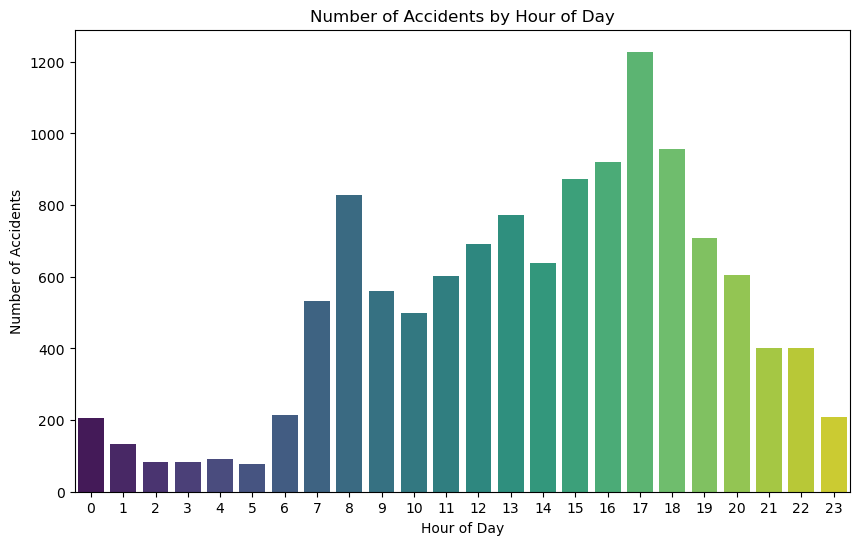

In [48]:
# Plot the number of accidents by hour
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_hour.index, y=accidents_by_hour.values, palette="viridis")
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour of Day')
plt.xticks(range(0, 24))
plt.show()

In [56]:
# Count the number of accidents by weather condition
accidents_by_cause = data['Cause_of_accident'].value_counts()


C:\Users\shiva\AppData\Local\Temp\ipykernel_736\4097903947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_cause.index, y=accidents_by_cause.values, palette="viridis")


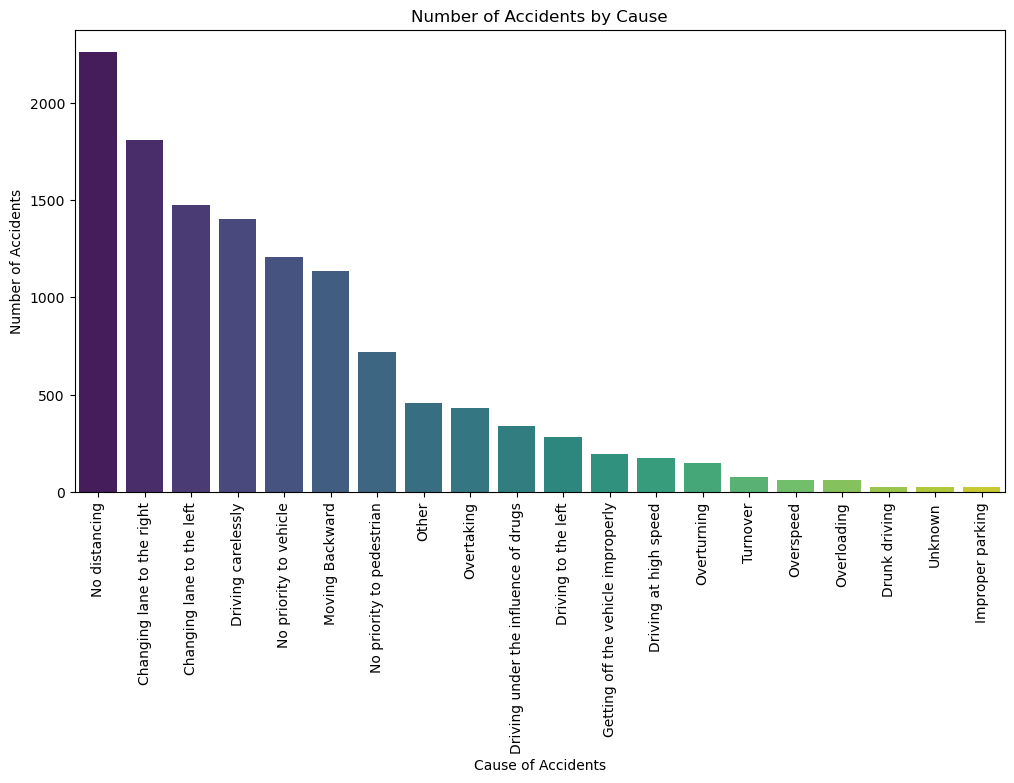

In [58]:
# Plot the number of accidents by weather condition
plt.figure(figsize=(12, 6))
sns.barplot(x=accidents_by_cause.index, y=accidents_by_cause.values, palette="viridis")
plt.xlabel('Cause of Accidents')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Cause')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Causes')

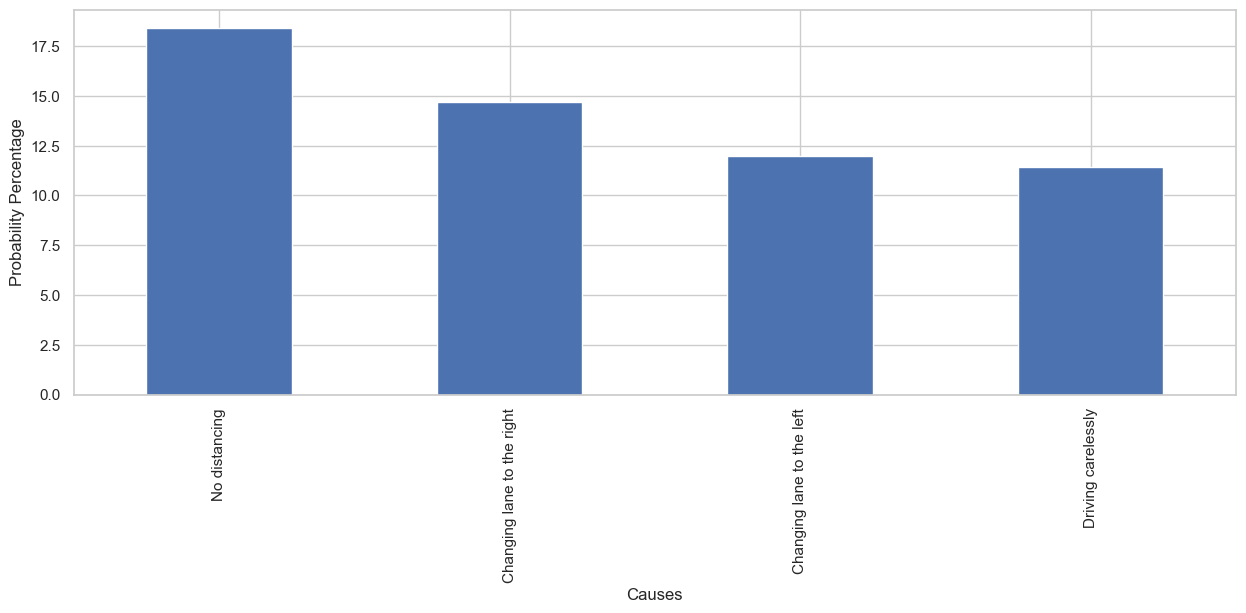

In [140]:
# Top 4 causes by probability percentage
plt.figure(figsize =(15,5))
a= data.loc[data['Cause_of_accident'] !="Unknown"]
bar_plot=((a.groupby('Cause_of_accident')['Cause_of_accident'].count().sort_values(ascending=False)/a['Cause_of_accident'].count())*100).head(4).plot.bar()
bar_plot.set_ylabel("Probability Percentage")
bar_plot.set_xlabel("Causes")

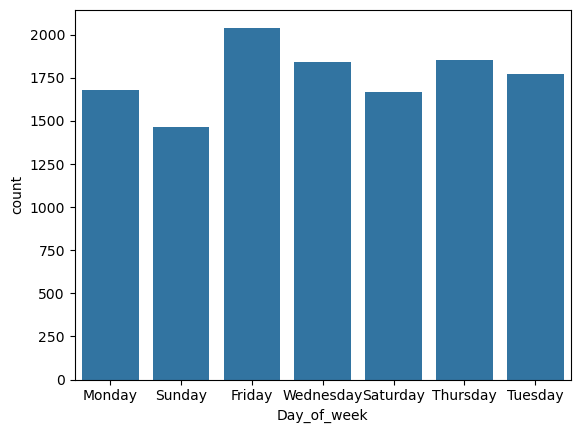

In [100]:
# Count distribution of Days 
sns.countplot(x="Day_of_week",data=data) 
plt.xticks(rotation='horizontal')
plt.show()

In [104]:
# Percentage distribution of driver's age
b=data.loc[data['Age_band_of_driver'] !="Unknown", ['Age_band_of_driver', 'Accident_severity']]
b=((b.groupby(['Age_band_of_driver']).size()/data["Age_band_of_driver"].count())*100)
b

Age_band_of_driver
18-30       34.678467
31-50       33.184475
Over 51     12.869438
Under 18     6.698603
dtype: float64

<Axes: title={'center': 'Percentages of accidents by age band'}>

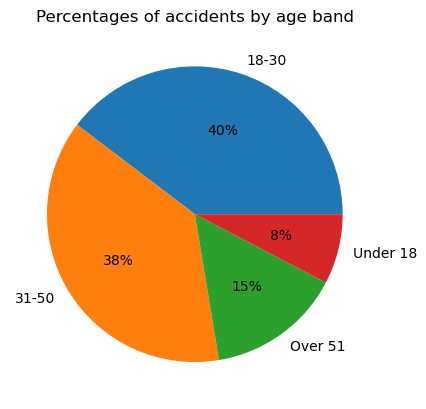

In [106]:
# Pie chart dsitribution of age groups
b.plot.pie(autopct='%1.0f%%', title='Percentages of accidents by age band')

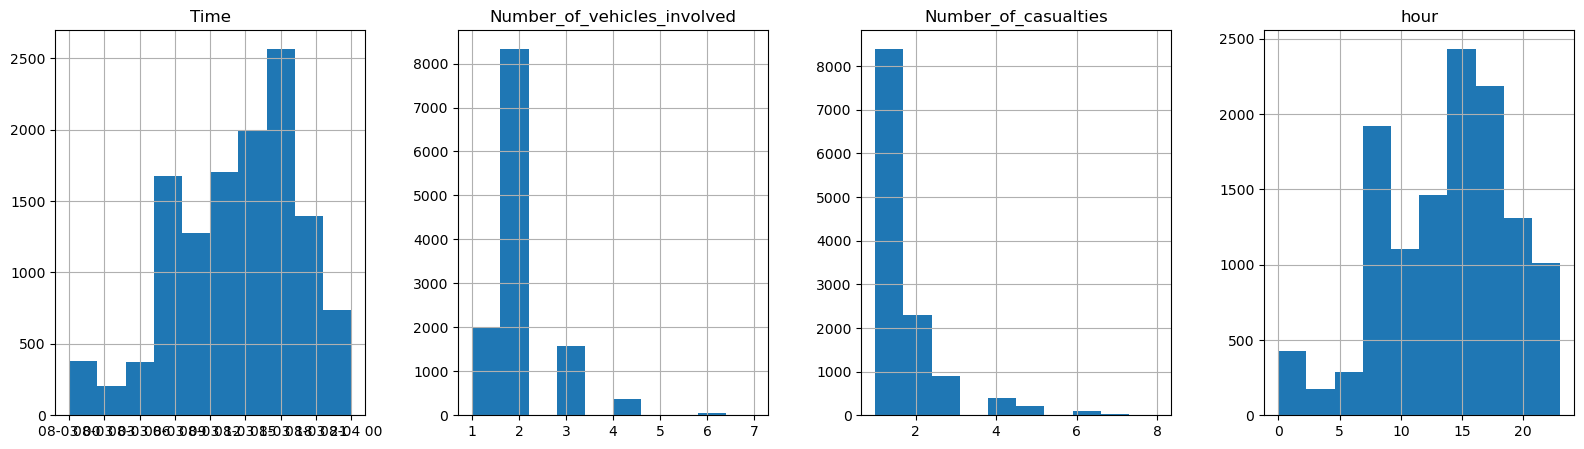

In [108]:
# Histogram distribution of numerical features
data.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [110]:
# Value counts of casualties
data['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

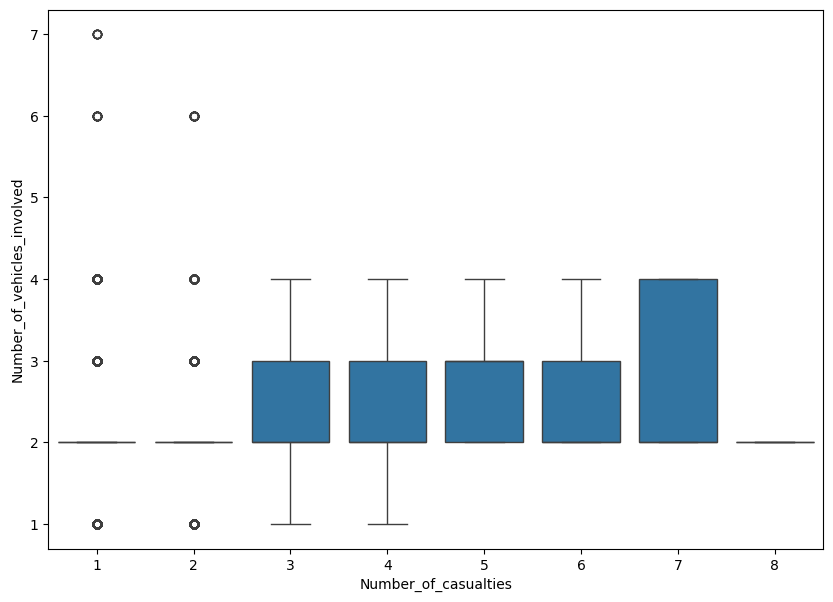

In [112]:
# Box plot distribution
plt.figure(figsize=(10,7))
sns.boxplot(data=data, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

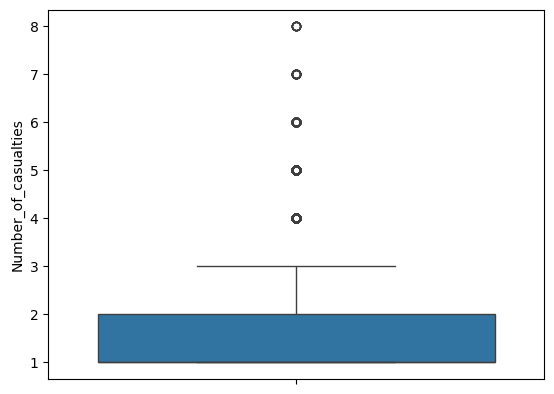

In [114]:
# Box plot distribution of casualties
sns.boxplot(data=data, y='Number_of_casualties')
plt.show()

In [116]:
# Value counts of vehicles involved in accidents 
data['Number_of_vehicles_involved'].value_counts()

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

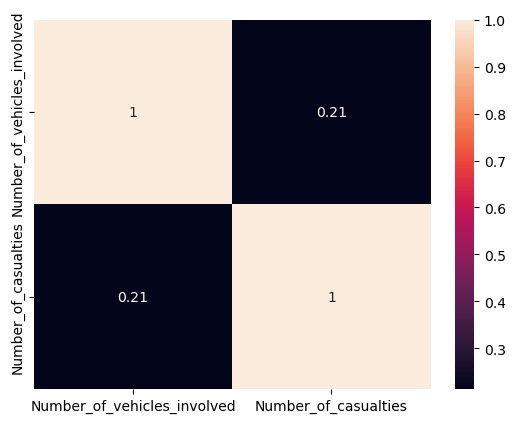

In [124]:
# Correlation description 
correlation_matrix = data[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

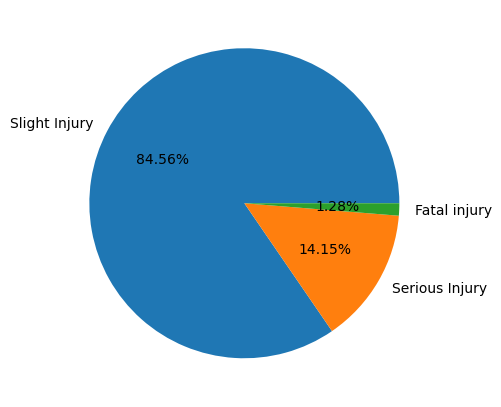

In [128]:
# Pie chart distribution of accident severity
plt.figure(figsize=(5,7))
plt.pie(x=data['Accident_severity'].value_counts().values,
        labels=data['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

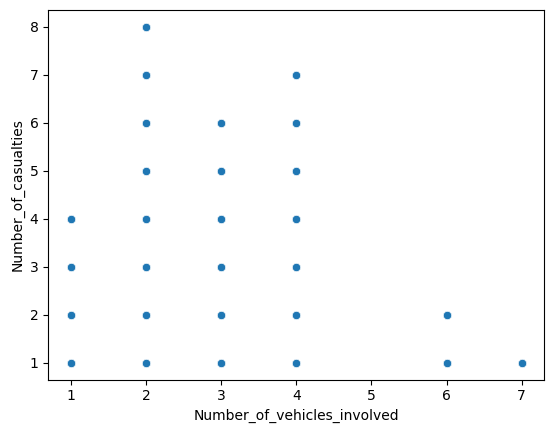

In [118]:
# Scatter plot relation
sns.scatterplot(x=data['Number_of_vehicles_involved'], y=data['Number_of_casualties'])
plt.show()

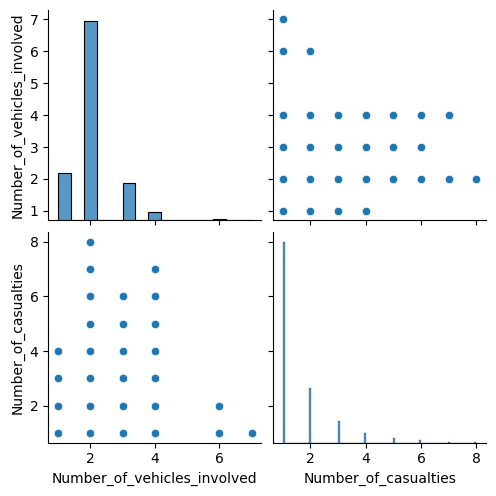

In [120]:
# Pair plot distribution
sns.pairplot(data[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)

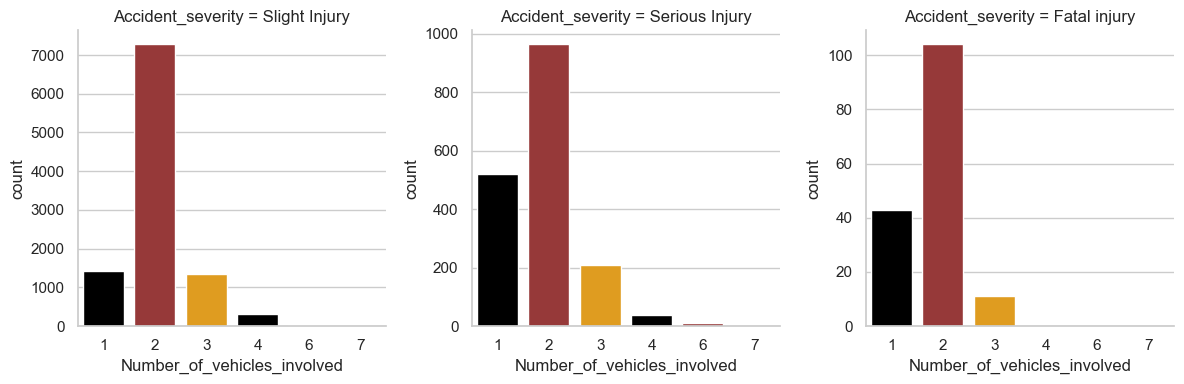

In [150]:
# creating agrid with columns as survived=0 and survived=1
grid = sns.FacetGrid(data=data, col='Accident_severity', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


C:\Users\shiva\AppData\Local\Temp\ipykernel_736\4021125373.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 0:', target_count[0])
C:\Users\shiva\AppData\Local\Temp\ipykernel_736\4021125373.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 1:', target_count[1])
C:\Users\shiva\AppData\Local\Temp\ipykernel_736\4021125373.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Proportion:', round(target

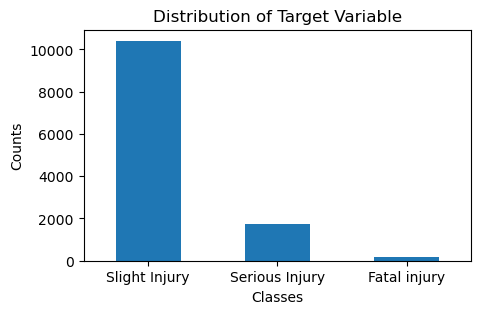

In [130]:
# Accident severity count distribution
target_count = data['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

# Create a bar plot
plt.figure(figsize=(5, 3))
target_count.plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.xticks(rotation='horizontal')
plt.show()

In [134]:
# Percentage calculation of Gender of the driver
((data.groupby(['Sex_of_driver']).size() / data["Sex_of_driver"].count()) * 100).add_prefix('Accidents Caused by ')

Sex_of_driver
Accidents Caused by Female      5.691783
Accidents Caused by Male       92.862943
Accidents Caused by Unknown     1.445274
dtype: float64

C:\Users\shiva\AppData\Local\Temp\ipykernel_736\1875402105.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex_of_driver', data=data, palette='viridis')


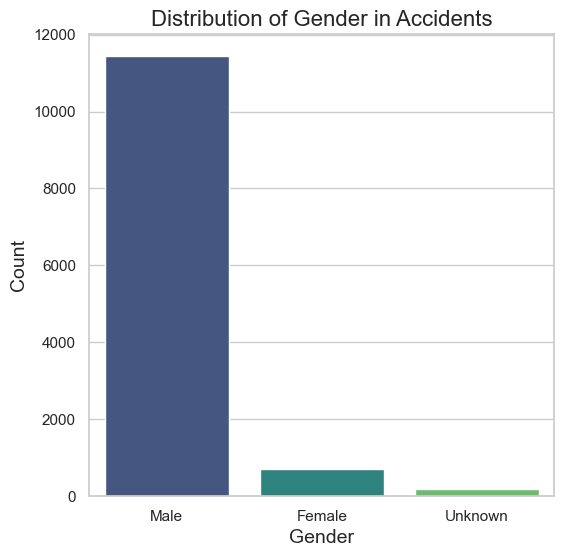

In [136]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Distribution of Gender using a bar chart
plt.figure(figsize=(6,6))
sns.countplot(x='Sex_of_driver', data=data, palette='viridis')
plt.title('Distribution of Gender in Accidents', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [142]:
# Storing categorical features into a variable
categorical=[i for i in data.columns if data[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [144]:
# Storing numerical features into a variable
numerical=[i for i in data.columns if data[i].dtype!='O']
print('The numerica variables are',numerical)

The numerica variables are ['Time', 'Number_of_vehicles_involved', 'Number_of_casualties', 'hour']


In [148]:
# Overview of the data
ff = pd.crosstab(index=data['Cause_of_accident'], columns=data['Accident_severity'], margins=True)
pd.crosstab(index=data['Cause_of_accident'], columns=data['Accident_severity'], margins=True)

print("P(Cause = Speed | Severity = Fatal) = " + str(((ff.iloc[2,2]+ff.iloc[15,2])/(data.where(data["Accident_severity"] == 2)['Accident_severity'].count()))))
ff

P(Cause = Speed | Severity = Fatal) = inf


C:\Users\shiva\AppData\Local\Temp\ipykernel_736\2289211363.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  print("P(Cause = Speed | Severity = Fatal) = " + str(((ff.iloc[2,2]+ff.iloc[15,2])/(data.where(data["Accident_severity"] == 2)['Accident_severity'].count()))))


Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Cause_of_accident,,,,
Changing lane to the left,16,206,1251,1473
Changing lane to the right,23,260,1525,1808
Driving at high speed,2,31,141,174
Driving carelessly,22,209,1171,1402
Driving to the left,4,53,227,284
Driving under the influence of drugs,5,46,289,340
Drunk driving,0,3,24,27
Getting off the vehicle improperly,3,29,165,197
Improper parking,1,2,22,25
